In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import numpy as np

In [4]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = r"\s+")

In [5]:
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


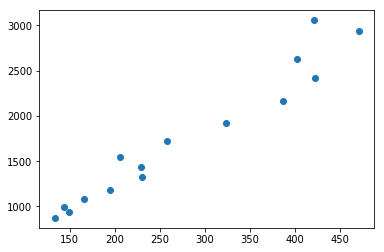

In [9]:
plt.scatter(data["invest"], data.gnp)

In [13]:
data["log_invest"] = data.invest.apply(m.log)
data["log_gnp"] = data.gnp.apply(m.log)

In [14]:
data.head()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
0,1968,873.4,133.3,82.54,5.16,4.892602,6.772394
1,1969,944.0,149.3,86.79,5.87,5.005958,6.850126
2,1970,992.7,144.2,91.45,5.95,4.971201,6.900429
3,1971,1077.6,166.4,96.01,4.88,5.114395,6.982492
4,1972,1185.9,195.0,100.00,4.50,5.273000,7.078257


In [18]:
data.describe()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667,5.532761,7.383521
std,4.472136,738.145808,117.582691,40.286606,2.812245,0.437486,0.422801
min,1968.000000,873.400000,133.300000,82.540000,4.500000,4.892602,6.772394
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000,5.193697,7.030374
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000,5.437209,7.345494
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000,5.977294,7.735140
max,1982.000000,3057.500000,471.500000,207.230000,13.420000,6.155919,8.025353


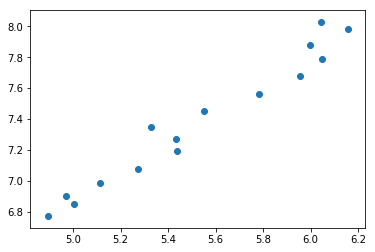

In [15]:
plt.scatter(data["log_invest"], data.log_gnp)

In [35]:
n = len(data)

In [22]:
y = data.log_invest.values
x = data.log_gnp.values

In [31]:
beta1_chap = sum((x-x.mean())*(y-y.mean()))/sum((x-x.mean())**2)

In [32]:
beta0_chap = y.mean() - beta1_chap*x.mean()

In [33]:
print("L'intercept vaut {} et la pente est {}".format(beta0_chap, beta1_chap))

L'intercept vaut -1.9635913352301815 et la pente est 1.015281401598871


In [74]:
sigma_chap_2 = (sum((y-(beta0_chap+beta1_chap*x))**2))/(n-2)

In [75]:
sigma_chap_2

0.0076763385554603995

In [76]:
var_beta0_chap = sigma_chap_2*(1/n+(x.mean()**2)/sum((x-x.mean())**2))

In [85]:
var_beta1_chap = sigma_chap_2/sum((x-x.mean())**2)

In [86]:
y_chap = beta0_chap + beta1_chap*x

In [87]:
R_2  = 1 - np.linalg.norm(y-y_chap)**2/np.linalg.norm(y-y.mean())**2

In [88]:
R_2

0.9627572956057855

In [89]:
beta1_chap

1.015281401598871

In [90]:
T_stat_pente = beta1_chap/m.sqrt(var_beta1_chap)

In [91]:
T_stat_pente

18.331984456866678

Or d'après une table de la loi de student pour 95% le quantile vaut 1,771. La t-statistique ne n'apparient à IC, donc il est fortement probable que la pente soit significative.

In [100]:
y_pred = beta0_chap + beta1_chap * m.log(1000)

In [101]:
m.exp(y_pred)

155.97942793105494